## Contribution to W. Olson review paper

### Manuscript Draft 2: Histogram

Objectives: 1-D Histograms of slide, roll, and twist cof xCAy and xACy


In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText

path = os.getcwd()

In [52]:
tet_dataset     = pd.read_csv("datafiles/czapla2022_3sig_tet", index_col=0)
tet_dataset_ori = pd.read_csv("datafiles/czapla2022_original", index_col=0)

tet_grid_ac = [x+'AC'+y for x in ['A','G','C','T'] for y in ['A','G','C','T']]
tet_grid_ca = [x+'CA'+y for x in ['A','G','C','T'] for y in ['A','G','C','T']]

tet_dataset_ac = tet_dataset[tet_dataset.step_dimer=="AC"].reset_index(drop=True)
tet_dataset_ca = tet_dataset[tet_dataset.step_dimer=="CA"].reset_index(drop=True)

tet_dataset_ac_ori = tet_dataset_ori[(tet_dataset_ori.step_dimer=="AC")
                                 &(tet_dataset_ori.step_tetramer.str.len()==4)
                                 &(~tet_dataset_ori.step_tetramer.str.contains("\."))].reset_index(drop=True)

tet_dataset_ca_ori = tet_dataset_ori[(tet_dataset_ori.step_dimer=="CA")
                                 &(tet_dataset_ori.step_tetramer.str.len()==4)
                                 &(~tet_dataset_ori.step_tetramer.str.contains("\."))].reset_index(drop=True)


del tet_dataset, tet_dataset_ori

In [53]:
tet_dataset_ca.head(5)

,tilt,roll,twist,shift,slide,rise,pdb_id,step_dimer,step_tetramer,dimer_neighbors,coding,DIMER,TETRAMER
0,3.8968,3.5625,34.8023,1.2387,0.5080,3.1555,1MNN,CA,ACAA,A__A,y,CA,ACAA
1,-1.9116,4.2104,31.0756,0.3187,-0.8429,3.4029,3G9M,CA,ACAA,A__A,y,CA,ACAA
2,-1.6840,5.6575,30.5065,0.5035,-0.9317,3.4752,3G9P,CA,ACAA,A__A,y,CA,ACAA
3,3.6386,-2.2727,40.1053,0.6039,0.8158,3.4250,6YCQ,CA,ACAA,A__A,y,CA,ACAA
4,-1.6840,5.6575,30.5065,0.5035,-0.9317,3.4752,3G9P,CA,ACAA,A__A,y,CA,ACAA


In [54]:
tet_dataset_ca_ori.head(5)

,tilt,roll,twist,shift,slide,rise,pdb_id,step,from_pdb,step_dimer,step_tetramer,dimer_neighbors
0,5.5027,3.6981,39.6236,0.9755,-0.2955,3.7337,1MNN,GACACA,y,CA,ACAC,A__C
1,3.8968,3.5625,34.8023,1.2387,0.5080,3.1555,1MNN,CACAAA,y,CA,ACAA,A__A
2,-0.5013,2.7369,33.6570,-0.7077,-0.2745,3.4299,3FDE,.CCATG,y,CA,CCAT,C__T
3,2.2579,4.5048,36.1281,-0.0594,0.5428,3.3366,4Z47,GACAGC,y,CA,ACAG,A__G
4,-2.8834,1.3804,38.6661,0.4431,-0.5854,3.3194,6BD0,TCCACT,y,CA,CCAC,C__C


In [55]:
print(len(tet_dataset_ca))
print(len(tet_dataset_ca_ori))

5403
4446


### Exploratory Data Viz

<Figure size 640x480 with 0 Axes>

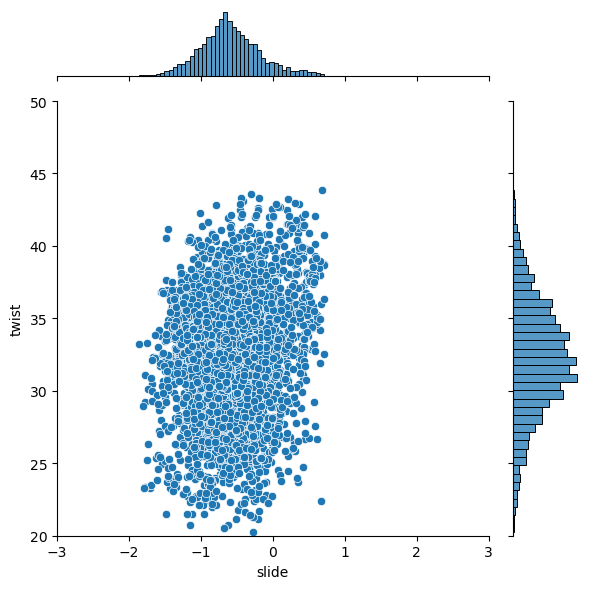

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

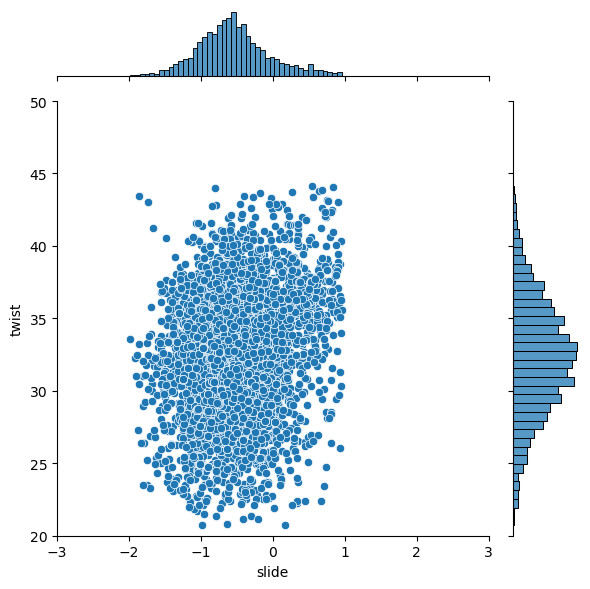

<Figure size 640x480 with 0 Axes>

In [5]:
fig = plt.figure()

sns.jointplot(data=tet_dataset_ac, 
               x='slide',
               y='twist')
plt.xlim(-3, 3)
plt.ylim(20, 50)
plt.tight_layout()
plt.show()
plt.clf()

fig = plt.figure()

sns.jointplot(data=tet_dataset_ac_ori, 
               x='slide',
               y='twist')
plt.xlim(-3, 3)
plt.ylim(20, 50)
plt.tight_layout()
plt.show()
plt.clf()

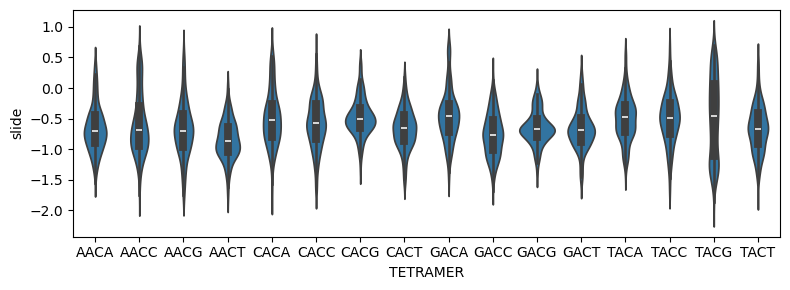

<Figure size 640x480 with 0 Axes>

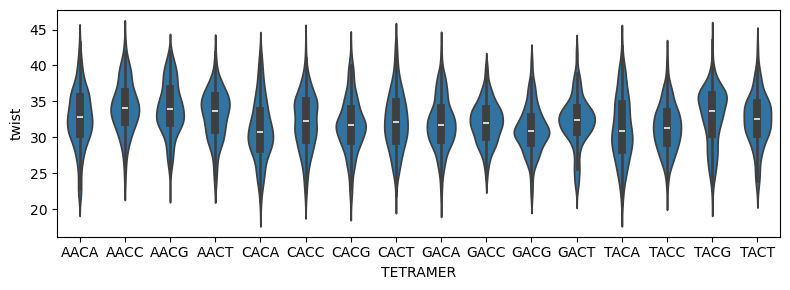

<Figure size 640x480 with 0 Axes>

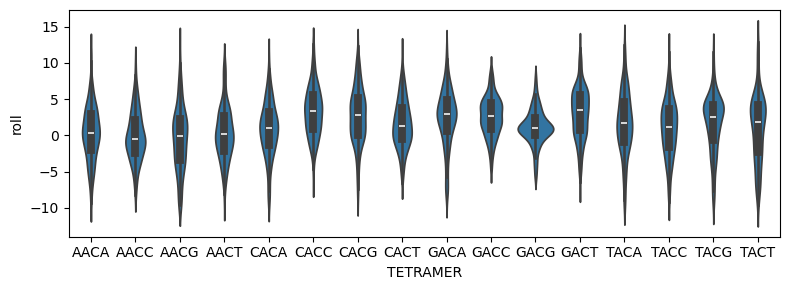

<Figure size 640x480 with 0 Axes>

In [8]:
for par in ['slide','twist','roll']:
    plt.figure(figsize=(8,3))
    sns.violinplot(data=tet_dataset_ac, y=par, x='TETRAMER')
    plt.tight_layout()
    plt.show()
    plt.clf()

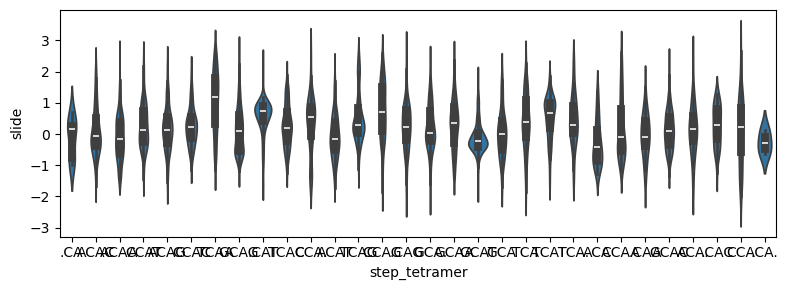

<Figure size 640x480 with 0 Axes>

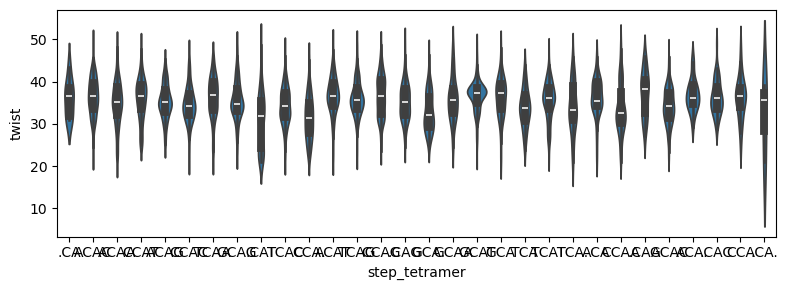

<Figure size 640x480 with 0 Axes>

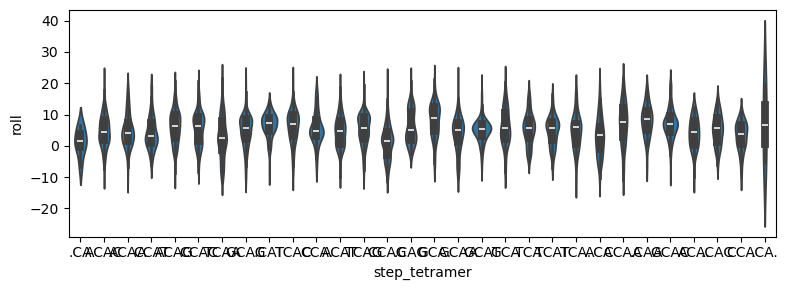

<Figure size 640x480 with 0 Axes>

In [14]:
for par in ['slide','twist','roll']:
    plt.figure(figsize=(8,3))
    sns.violinplot(data=tet_dataset_ca_ori, y=par, x='step_tetramer')
    plt.tight_layout()
    plt.show()
    plt.clf()

### Plotting of 3-sigma culled data

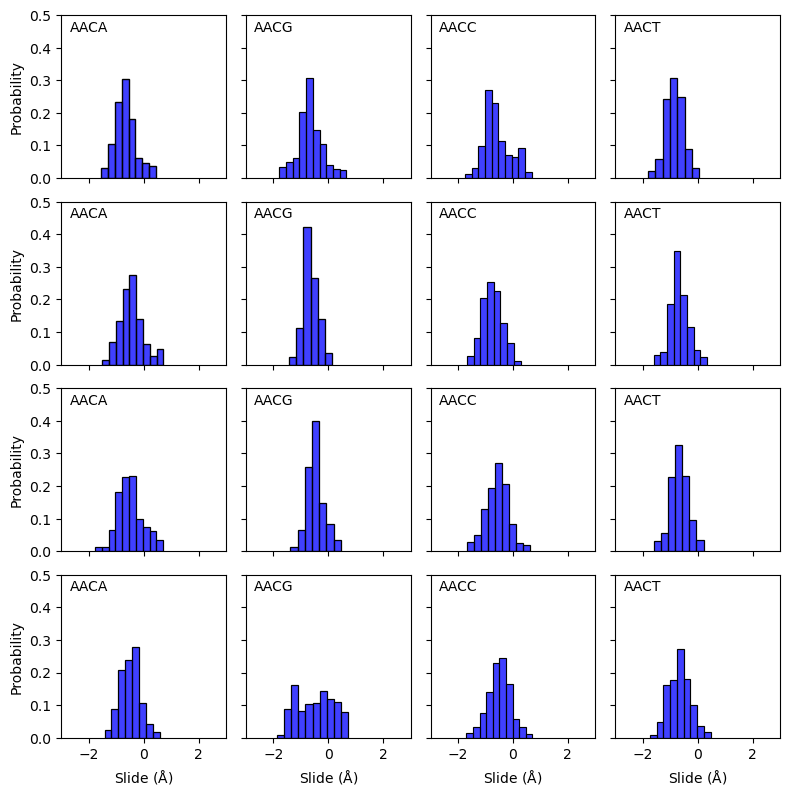

<Figure size 640x480 with 0 Axes>

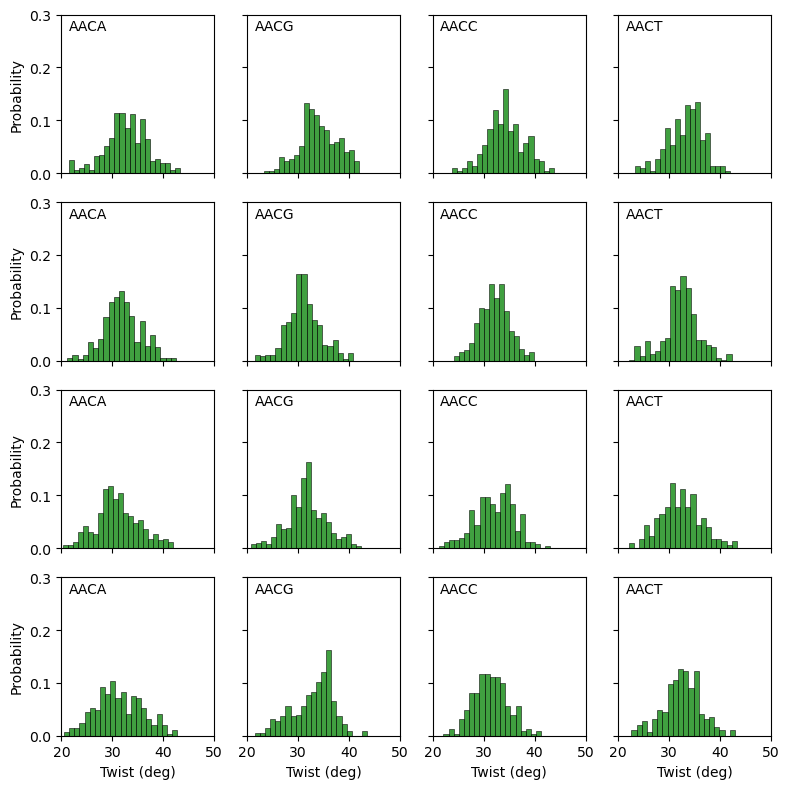

<Figure size 640x480 with 0 Axes>

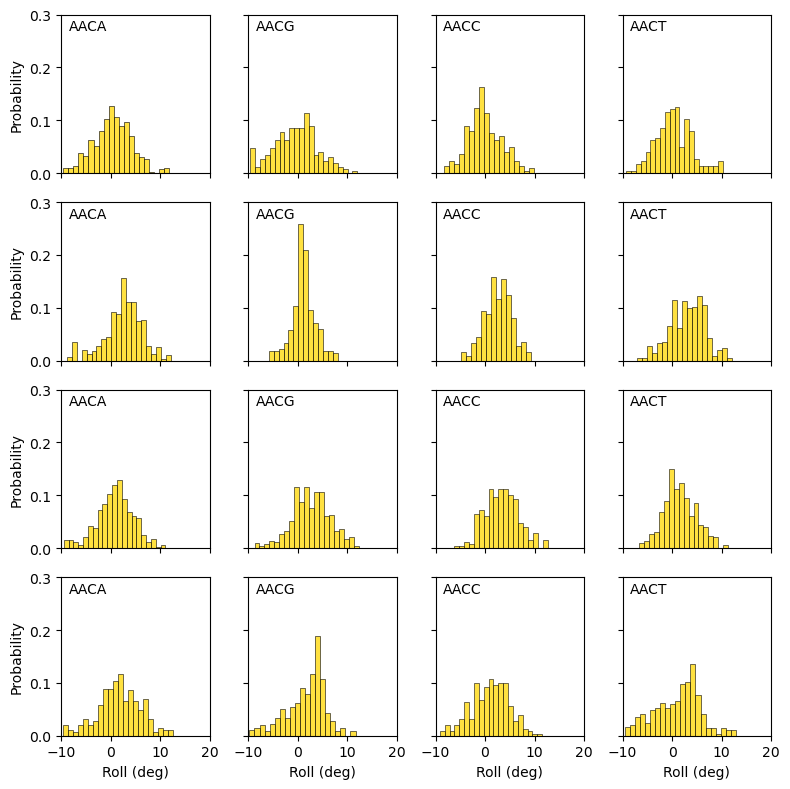

<Figure size 640x480 with 0 Axes>

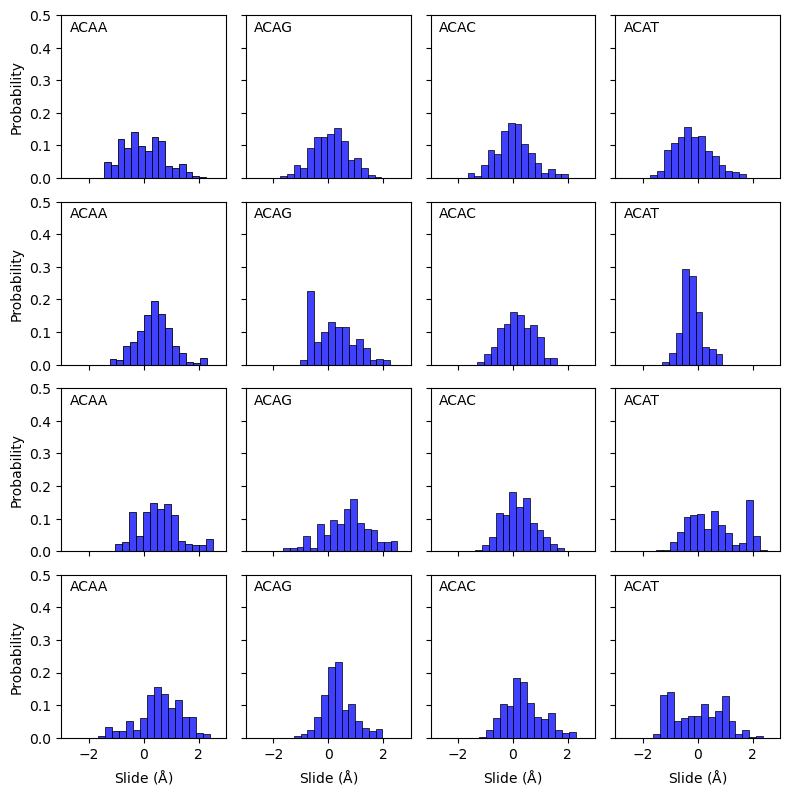

<Figure size 640x480 with 0 Axes>

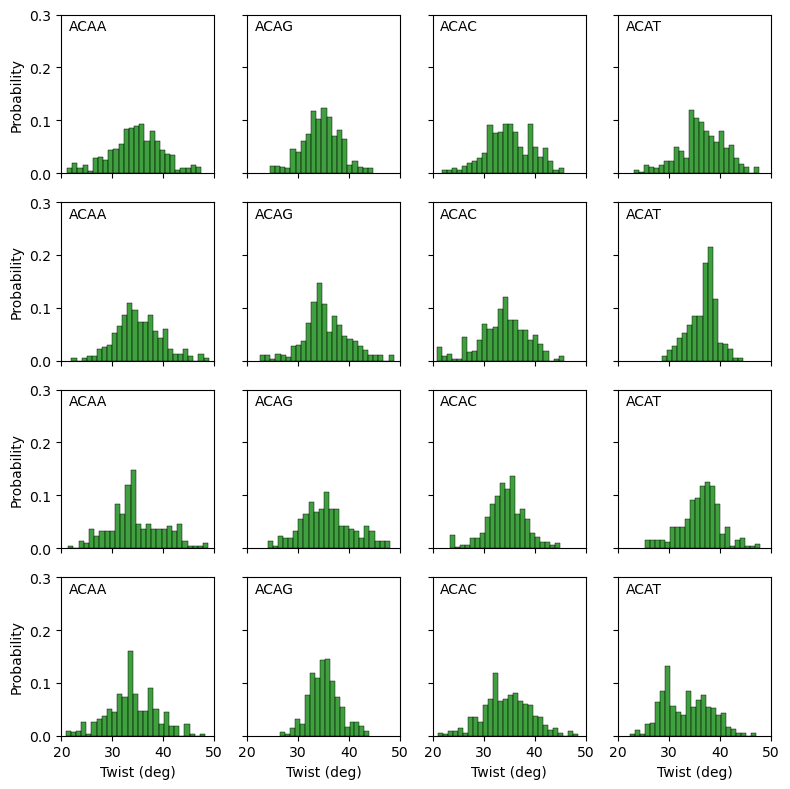

<Figure size 640x480 with 0 Axes>

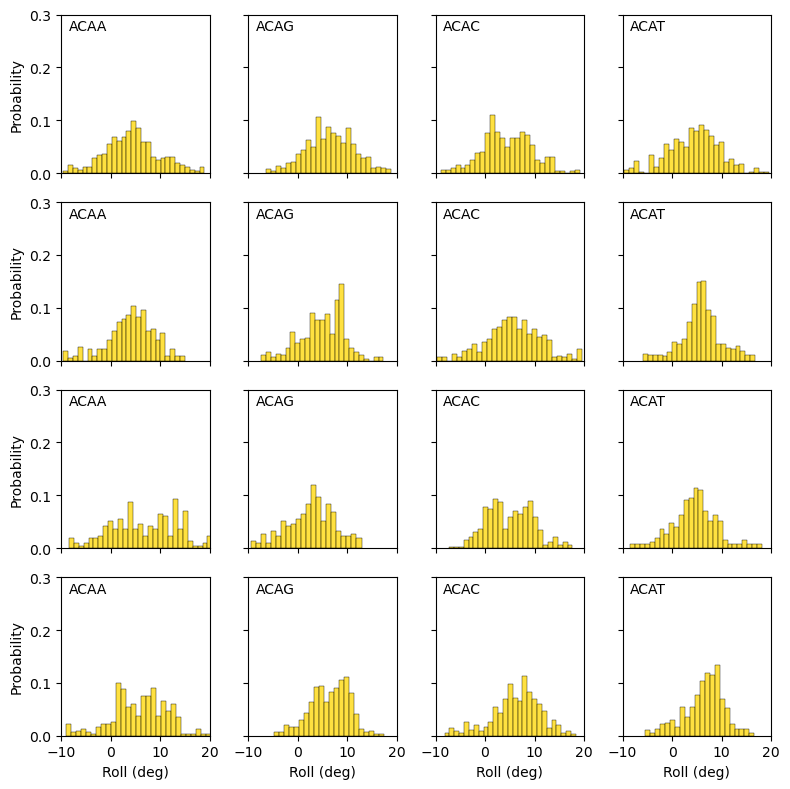

<Figure size 640x480 with 0 Axes>

In [47]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'gold'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
par_labels = {'slide':'Slide ($\mathrm{\AA}$)', 'twist':'Twist (deg)', 'roll':'Roll (deg)'}

for dim in ['AC','CA']:
    if dim == 'AC':
        plot_df = tet_dataset_ac.copy()
        tet_grid = tet_grid_ac
    else:
        plot_df = tet_dataset_ca.copy()
        tet_grid = tet_grid_ca

    for PAR in ['slide','twist','roll']:
        
        fig, axes = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)

        for i in range(0, 4):
            
            sns.histplot(ax=axes[0,i], data=plot_df[plot_df.TETRAMER==tet_grid[i]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], fill=True#,
                         #kde=True, line_kws={'color':'r'}
                         )
            axes[0,i].set(xlabel='')
            axes[0,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[0,i].transAxes)
            
            sns.histplot(ax=axes[1,i], data=plot_df[plot_df.TETRAMER==tet_grid[i+4]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], fill=True#,
                         #kde=True, line_kws={'color':'r'}
                         )
            axes[1,i].set(xlabel='')
            axes[1,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[1,i].transAxes)
            
            sns.histplot(ax=axes[2,i], data=plot_df[plot_df.TETRAMER==tet_grid[i+8]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], fill=True#,
                         #kde=True, line_kws={'color':'r'}
                         )
            axes[2,i].set(xlabel='')
            axes[2,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[2,i].transAxes)
            
            sns.histplot(ax=axes[3,i], data=plot_df[plot_df.TETRAMER==tet_grid[i+12]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], fill=True#,
                         #kde=True, line_kws={'color':'r'}
                         )
            axes[3,i].set(xlabel=par_labels[PAR])
            axes[3,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[3,i].transAxes)


        for i in range(0, 4):
            for j in range(0, 4):
                if PAR == "slide":
                    axes[i,j].set(ylabel='Probability',
                                xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.50))
                else:
                    axes[i,j].set(ylabel='Probability',
                                xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.30))

        plt.tight_layout()
        plt.savefig("hist_4x4_"+PAR+"_"+dim+"_kde-off.png", transparent=True, dpi=600)
        plt.show()
        plt.clf()

del par_colors, par_ranges, par_bins, par_labels, plot_df, tet_grid

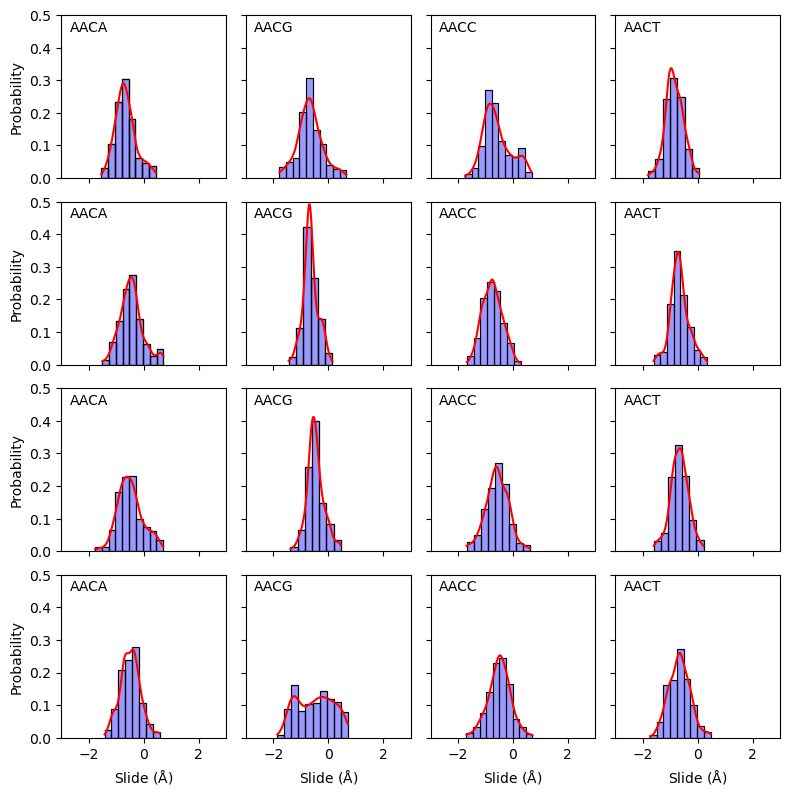

<Figure size 640x480 with 0 Axes>

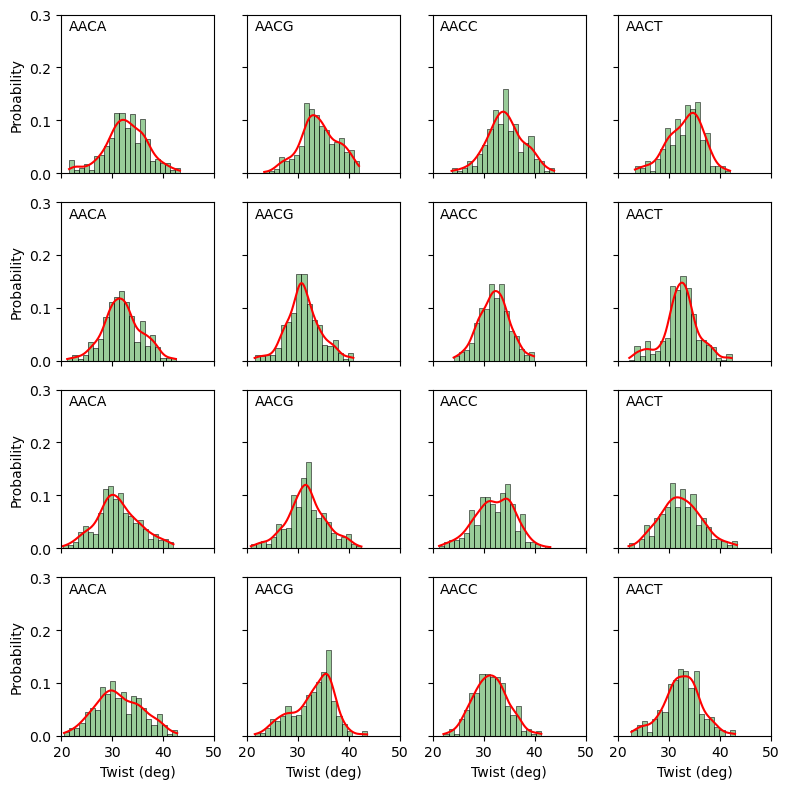

<Figure size 640x480 with 0 Axes>

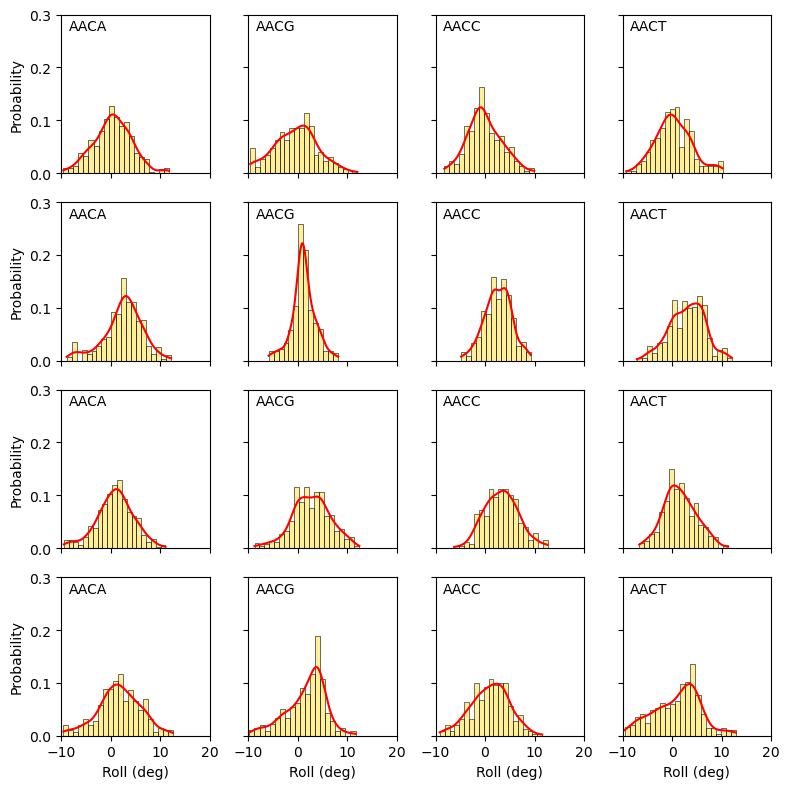

<Figure size 640x480 with 0 Axes>

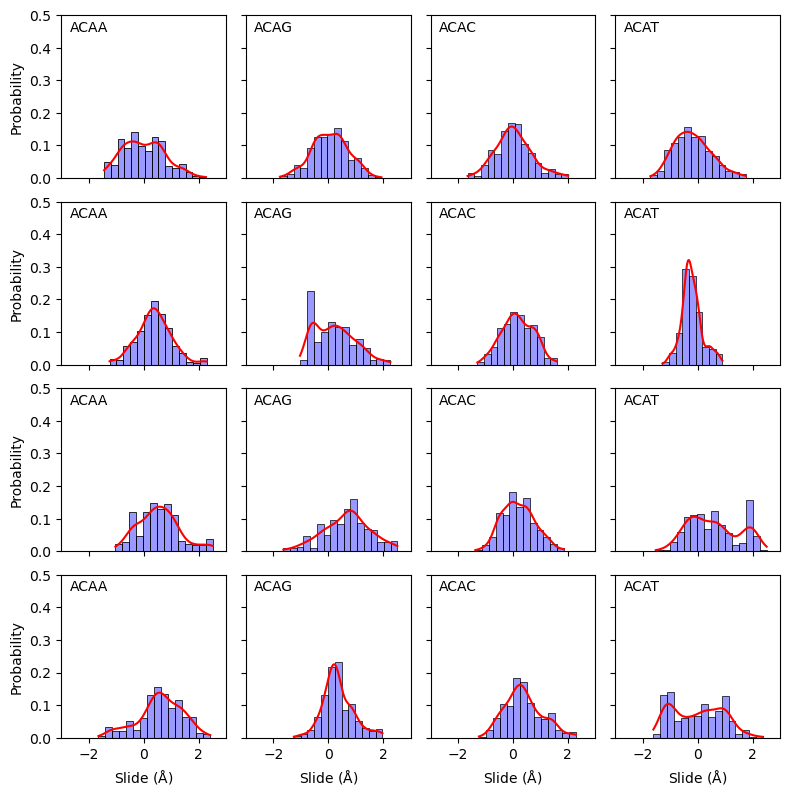

<Figure size 640x480 with 0 Axes>

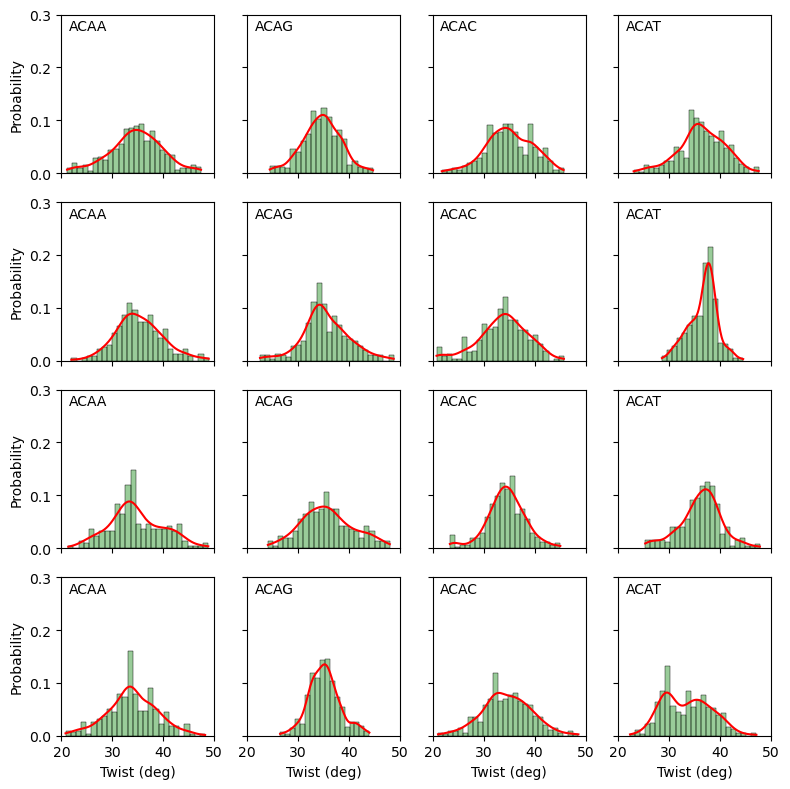

<Figure size 640x480 with 0 Axes>

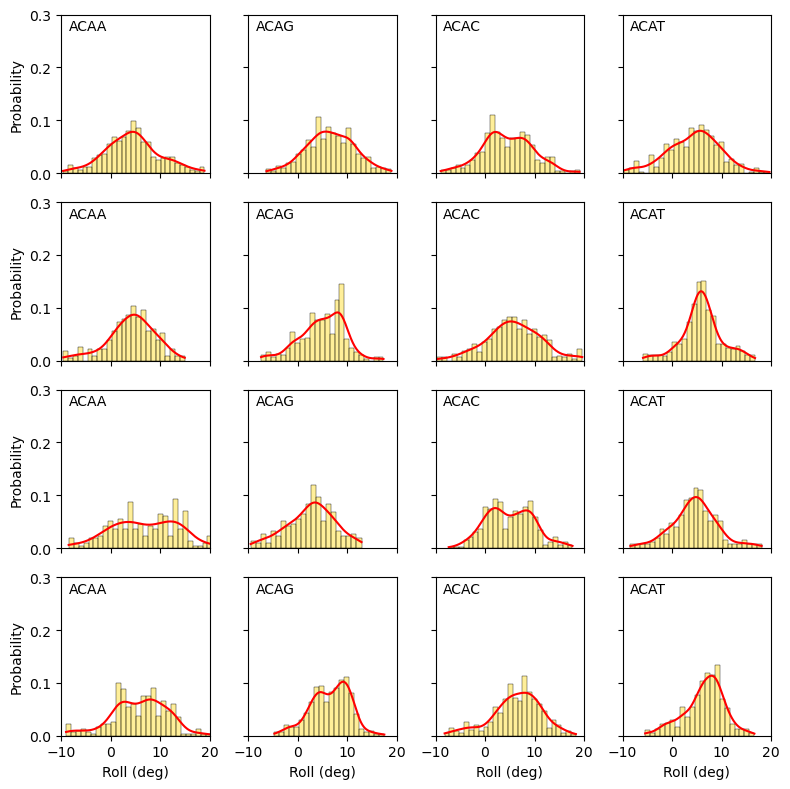

<Figure size 640x480 with 0 Axes>

In [48]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'gold'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
par_labels = {'slide':'Slide ($\mathrm{\AA}$)', 'twist':'Twist (deg)', 'roll':'Roll (deg)'}

for dim in ['AC','CA']:
    if dim == 'AC':
        plot_df = tet_dataset_ac.copy()
        tet_grid = tet_grid_ac
    else:
        plot_df = tet_dataset_ca.copy()
        tet_grid = tet_grid_ca

    for PAR in ['slide','twist','roll']:
        
        fig, axes = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)

        for i in range(0, 4):
            
            sns.histplot(ax=axes[0,i], data=plot_df[plot_df.TETRAMER==tet_grid[i]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[0,i].lines[0].set_color('red')
            axes[0,i].set(xlabel='')
            axes[0,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[0,i].transAxes)
            
            sns.histplot(ax=axes[1,i], data=plot_df[plot_df.TETRAMER==tet_grid[i+4]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[1,i].lines[0].set_color('red')
            axes[1,i].set(xlabel='')
            axes[1,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[1,i].transAxes)
            
            sns.histplot(ax=axes[2,i], data=plot_df[plot_df.TETRAMER==tet_grid[i+8]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[2,i].lines[0].set_color('red')
            axes[2,i].set(xlabel='')
            axes[2,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[2,i].transAxes)
            
            sns.histplot(ax=axes[3,i], data=plot_df[plot_df.TETRAMER==tet_grid[i+12]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[3,i].lines[0].set_color('red')
            axes[3,i].set(xlabel=par_labels[PAR])
            axes[3,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[3,i].transAxes)


        for i in range(0, 4):
            for j in range(0, 4):
                if PAR == "slide":
                    axes[i,j].set(ylabel='Probability',
                                xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.50))
                else:
                    axes[i,j].set(ylabel='Probability',
                                xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.30))

        plt.tight_layout()
        plt.savefig("hist_4x4_"+PAR+"_"+dim+"_kde-on.png", transparent=True, dpi=600)
        plt.show()
        plt.clf()

del par_colors, par_ranges, par_bins, par_labels, plot_df, tet_grid

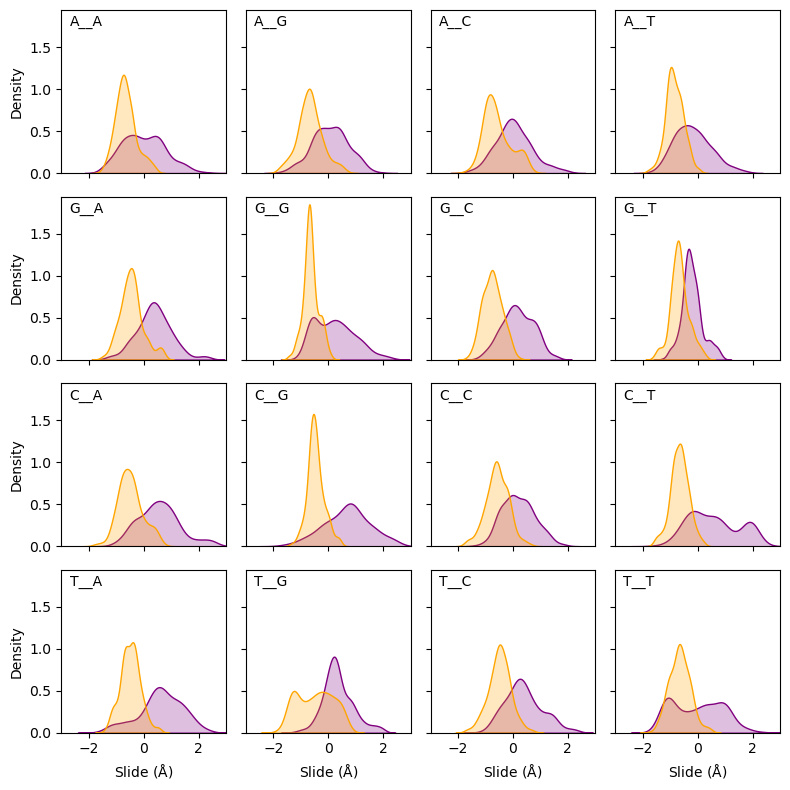

<Figure size 640x480 with 0 Axes>

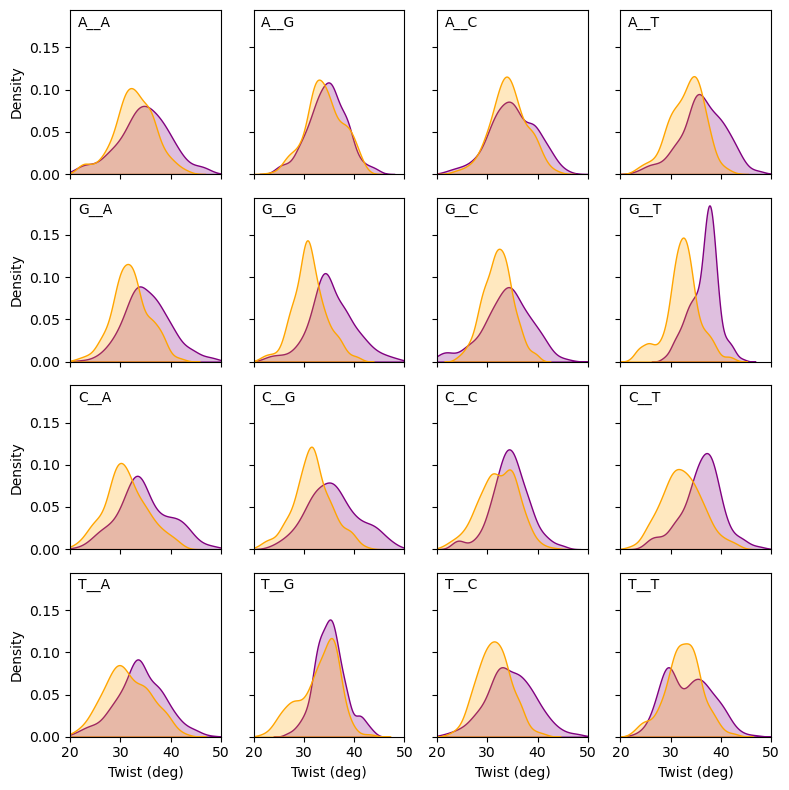

<Figure size 640x480 with 0 Axes>

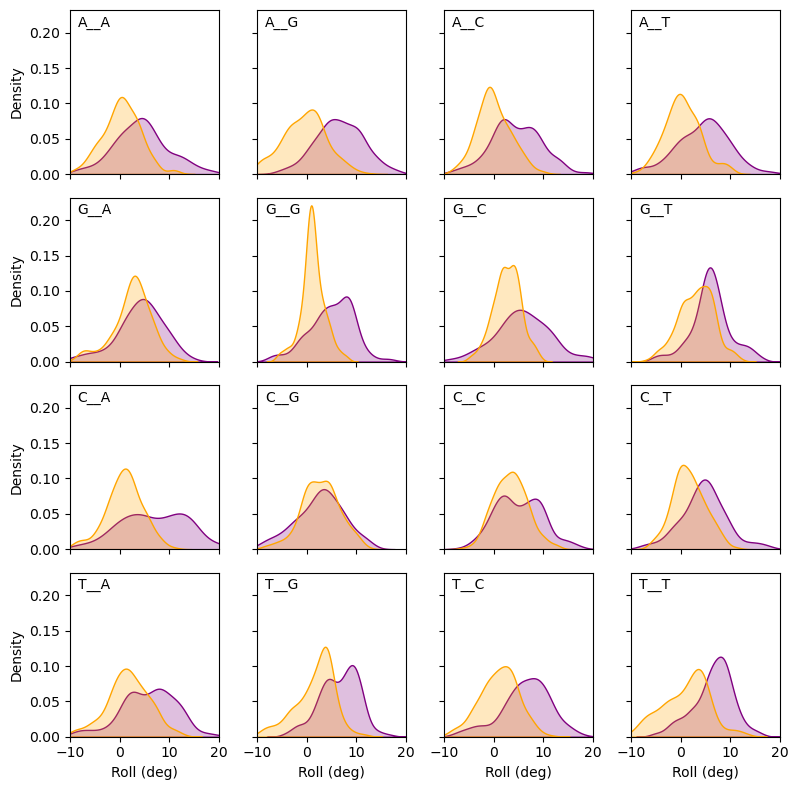

<Figure size 640x480 with 0 Axes>

In [51]:
dimsteps_colors = {'AC':'orange', 'CA':'purple'}
par_ranges      = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins        = {'slide':0.25, 'twist':1.0, 'roll':1.0}
par_labels      = {'slide':'Slide ($\mathrm{\AA}$)', 'twist':'Twist (deg)', 'roll':'Roll (deg)'}


for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)

    for i in range(0, 4):
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(xlabel='')
        axes[0,i].text(0.05, 0.90,  tet_grid_ca[i][0]+"__"+tet_grid_ca[i][3], horizontalalignment="left", transform=axes[0,i].transAxes)

        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i+4]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i+4]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[1,i].set(xlabel='')
        axes[1,i].text(0.05, 0.90,  tet_grid_ca[i+4][0]+"__"+tet_grid_ca[i+4][3], horizontalalignment="left", transform=axes[1,i].transAxes)

        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i+8]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i+8]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[2,i].set(xlabel='')
        axes[2,i].text(0.05, 0.90, tet_grid_ca[i+8][0]+"__"+tet_grid_ca[i+8][3], horizontalalignment="left", transform=axes[2,i].transAxes)

        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i+12]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i+12]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[3,i].set(xlabel=par_labels[PAR])
        axes[3,i].text(0.05, 0.90, tet_grid_ca[i+12][0]+"__"+tet_grid_ca[i+12][3], horizontalalignment="left", transform=axes[3,i].transAxes)

    for i in range(0, 4):
        for j in range(0, 4):
                axes[i,j].set(ylabel='Density',
                            xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

    plt.tight_layout()
    plt.savefig("dimercomp_kde_4x4_"+PAR+".png", transparent=True, dpi=600)
    plt.show()
    plt.clf()

del dimsteps_colors, par_ranges, par_bins, par_labels

### Plotting of original data, non-pre-discarded


In [103]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'gold'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
par_labels = {'slide':'Slide ($\mathrm{\AA}$)', 'twist':'Twist (deg)', 'roll':'Roll (deg)'}

for dim in ['AC','CA']:
    if dim == 'AC':
        plot_df = tet_dataset_ac_ori.copy()
        tet_grid = tet_grid_ac
    else:
        plot_df = tet_dataset_ca_ori.copy()
        tet_grid = tet_grid_ca

    for PAR in ['slide','twist','roll']:
        
        fig, axes = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)

        for i in range(0, 4):
            
            sns.histplot(ax=axes[0,i], data=plot_df[plot_df.step_tetramer==tet_grid[i]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[0,i].lines[0].set_color('red')
            axes[0,i].set(xlabel='')
            axes[0,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[0,i].transAxes)
            
            sns.histplot(ax=axes[1,i], data=plot_df[plot_df.step_tetramer==tet_grid[i+4]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[1,i].lines[0].set_color('red')
            axes[1,i].set(xlabel='')
            axes[1,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[1,i].transAxes)
            
            sns.histplot(ax=axes[2,i], data=plot_df[plot_df.step_tetramer==tet_grid[i+8]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[2,i].lines[0].set_color('red')
            axes[2,i].set(xlabel='')
            axes[2,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[2,i].transAxes)
            
            sns.histplot(ax=axes[3,i], data=plot_df[plot_df.step_tetramer==tet_grid[i+12]], 
                         x=PAR, stat='probability', binwidth=par_bins[PAR], color=par_colors[PAR], alpha=0.4, fill=True,
                         kde=True
                         )
            axes[3,i].lines[0].set_color('red')
            axes[3,i].set(xlabel=par_labels[PAR])
            axes[3,i].text(0.05, 0.90, tet_grid[i], horizontalalignment="left", transform=axes[3,i].transAxes)


        for i in range(0, 4):
            for j in range(0, 4):
                if PAR == "slide":
                    axes[i,j].set(ylabel='Probability',
                                xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.50))
                else:
                    axes[i,j].set(ylabel='Probability',
                                xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.30))

        plt.tight_layout()
        plt.show()
        plt.clf()

del par_colors, par_ranges, par_bins, par_labels, plot_df, tet_grid

KeyboardInterrupt: 

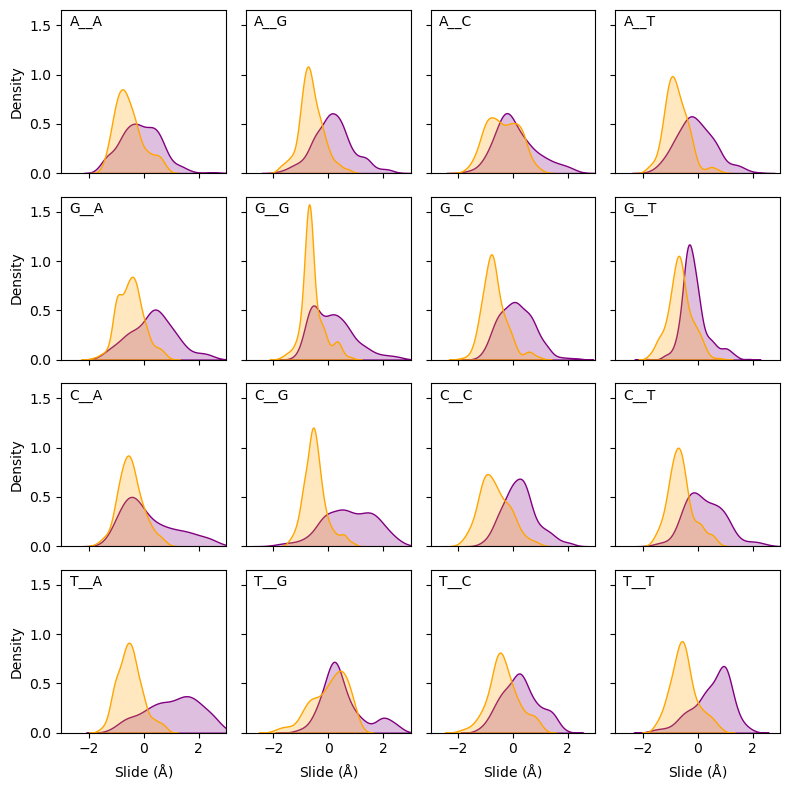

<Figure size 640x480 with 0 Axes>

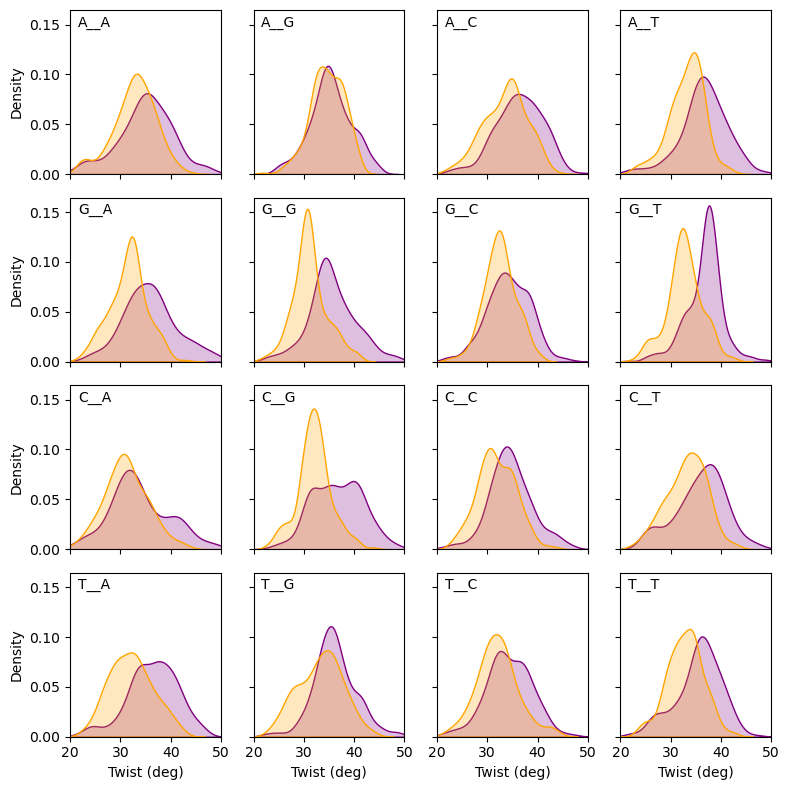

<Figure size 640x480 with 0 Axes>

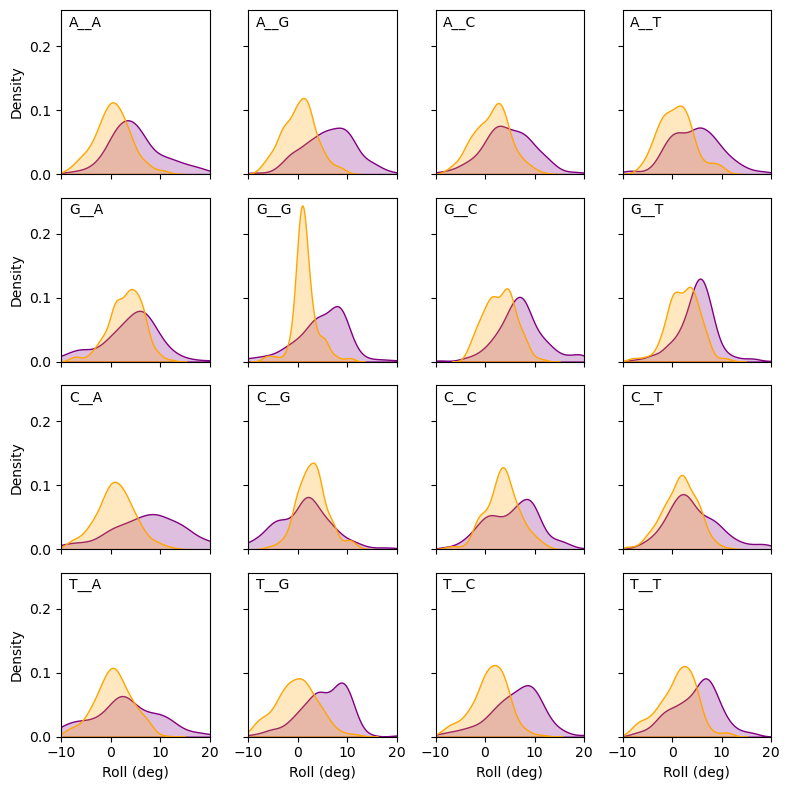

<Figure size 640x480 with 0 Axes>

In [59]:
dimsteps_colors = {'AC':'orange', 'CA':'purple'}
par_ranges      = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins        = {'slide':0.25, 'twist':1.0, 'roll':1.0}
par_labels      = {'slide':'Slide ($\mathrm{\AA}$)', 'twist':'Twist (deg)', 'roll':'Roll (deg)'}


for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)

    for i in range(0, 4):
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ca_ori[tet_dataset_ca_ori.step_tetramer==tet_grid_ca[i]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ac_ori[tet_dataset_ac_ori.step_tetramer==tet_grid_ac[i]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(xlabel='')
        axes[0,i].text(0.05, 0.90,  tet_grid_ca[i][0]+"__"+tet_grid_ca[i][3], horizontalalignment="left", transform=axes[0,i].transAxes)

        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ca_ori[tet_dataset_ca_ori.step_tetramer==tet_grid_ca[i+4]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ac_ori[tet_dataset_ac_ori.step_tetramer==tet_grid_ac[i+4]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[1,i].set(xlabel='')
        axes[1,i].text(0.05, 0.90,  tet_grid_ca[i+4][0]+"__"+tet_grid_ca[i+4][3], horizontalalignment="left", transform=axes[1,i].transAxes)

        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ca_ori[tet_dataset_ca_ori.step_tetramer==tet_grid_ca[i+8]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ac_ori[tet_dataset_ac_ori.step_tetramer==tet_grid_ac[i+8]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[2,i].set(xlabel='')
        axes[2,i].text(0.05, 0.90, tet_grid_ca[i+8][0]+"__"+tet_grid_ca[i+8][3], horizontalalignment="left", transform=axes[2,i].transAxes)

        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ca_ori[tet_dataset_ca_ori.step_tetramer==tet_grid_ca[i+12]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ac_ori[tet_dataset_ac_ori.step_tetramer==tet_grid_ac[i+12]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[3,i].set(xlabel=par_labels[PAR])
        axes[3,i].text(0.05, 0.90, tet_grid_ca[i+12][0]+"__"+tet_grid_ca[i+12][3], horizontalalignment="left", transform=axes[3,i].transAxes)

    for i in range(0, 4):
        for j in range(0, 4):
                axes[i,j].set(ylabel='Density',
                            xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

    plt.tight_layout()
    plt.show()
    plt.clf()

del dimsteps_colors, par_ranges, par_bins, par_labels

### Try: use numpy to get histogram, then plot


In [115]:
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins   = {'slide':0.25, 'twist':1.0, 'roll':1.0}

for dim in ['AC','CA']:
    if dim == 'AC':
        data_df = tet_dataset_ac.copy()
        tet_grid = tet_grid_ac
    else:
        data_df = tet_dataset_ca.copy()
        tet_grid = tet_grid_ca

    for PAR in ['twist','slide','roll']:
        par_binning  = np.arange(par_ranges[PAR][0], par_ranges[PAR][1], par_bins[PAR])
        hist_df      = pd.DataFrame(columns=['bins']+tet_grid)
        hist_df.bins = par_binning
        
        for i in range(0, len(tet_grid)):     
                data_par_df = data_df[data_df.TETRAMER==tet_grid[i]][PAR]
                data_hist   = np.histogram(data_par_df,
                                           #range=(par_ranges[PAR][0], par_ranges[PAR][1])#,
                                           bins=np.arange(par_ranges[PAR][0], par_ranges[PAR][1]+par_bins[PAR], par_bins[PAR])
                                           )
                hist_df[tet_grid[i]] = data_hist[0]
                del data_par_df, data_hist
        hist_df = hist_df.reset_index(drop=True).set_index(['bins'])

        norm_hist_df = hist_df.copy()
        for i in range(0, len(tet_grid)): 
            norm_hist_df[tet_grid[i]]=norm_hist_df[tet_grid[i]]/norm_hist_df[tet_grid[i]].sum()
        
        hist_df.to_csv("hist_tetramer_"+PAR+"_"+dim)
        norm_hist_df.to_csv("hist_tetramer_norm_"+PAR+"_"+dim)
        
        del par_binning, hist_df, norm_hist_df

    del data_df, tet_grid
del par_bins, par_ranges


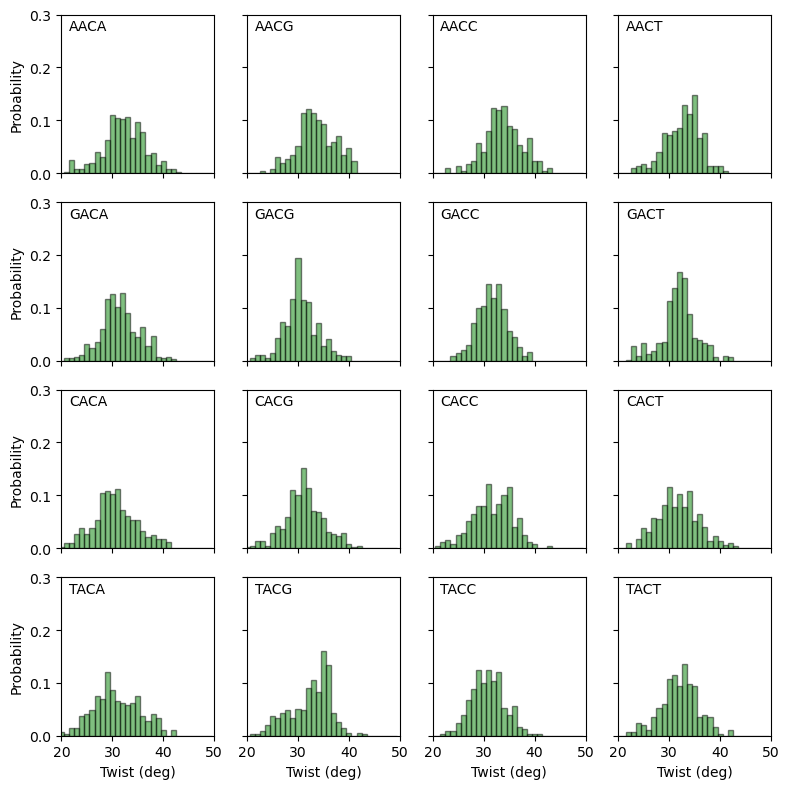

<Figure size 640x480 with 0 Axes>

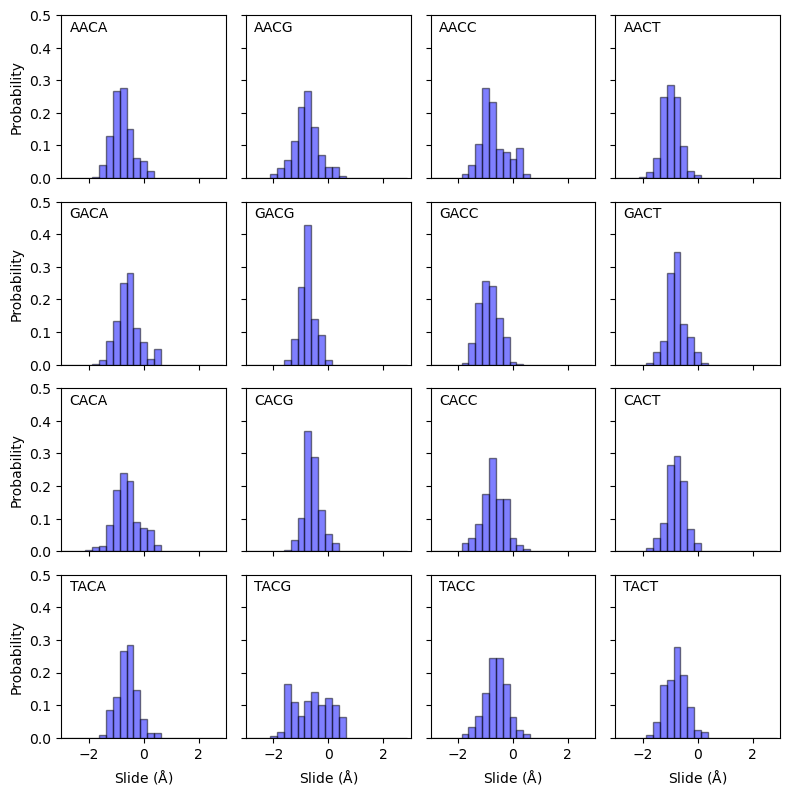

<Figure size 640x480 with 0 Axes>

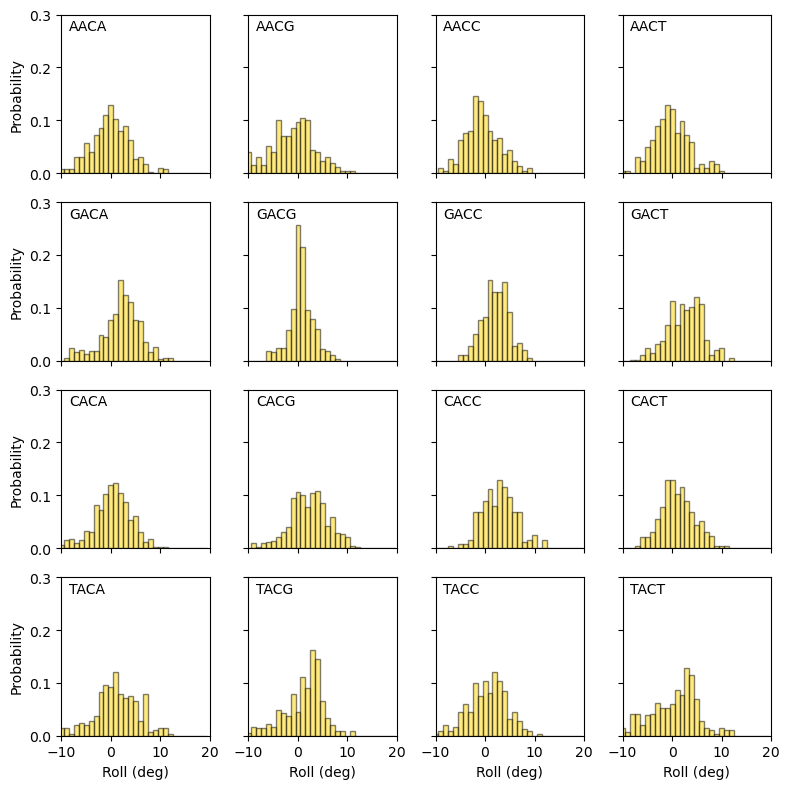

<Figure size 640x480 with 0 Axes>

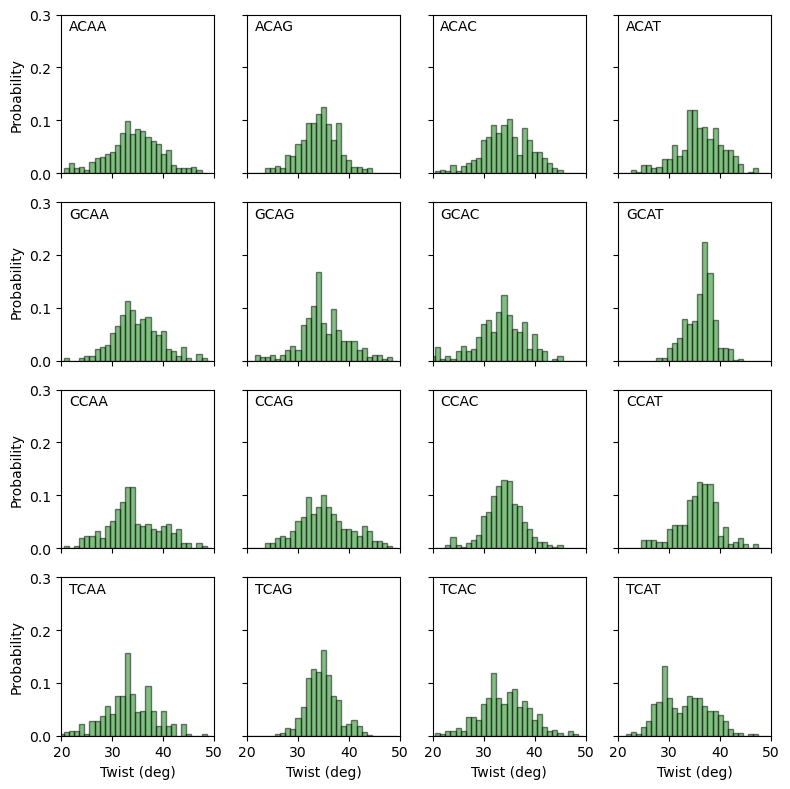

<Figure size 640x480 with 0 Axes>

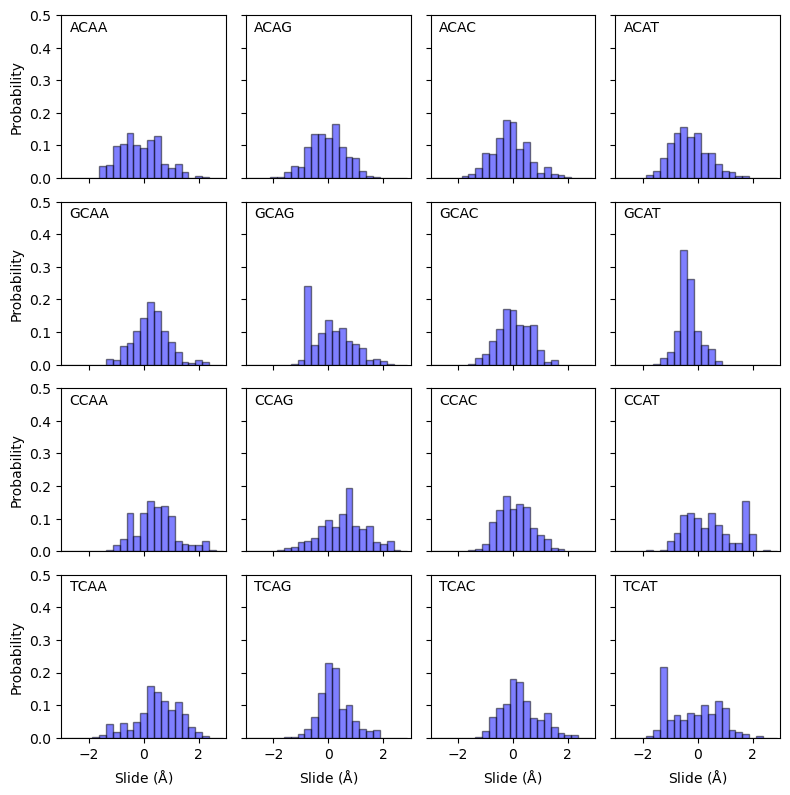

<Figure size 640x480 with 0 Axes>

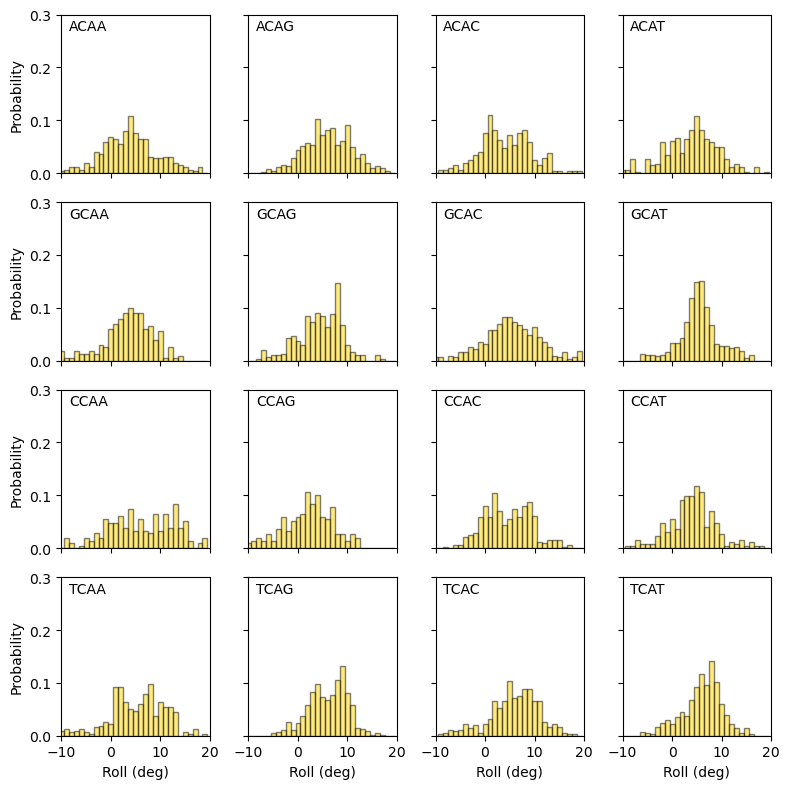

<Figure size 640x480 with 0 Axes>

In [126]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'gold'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
par_labels = {'slide':'Slide ($\mathrm{\AA}$)', 'twist':'Twist (deg)', 'roll':'Roll (deg)'}


for dim in ['AC','CA']:
    if dim == 'AC':
        tet_grid = tet_grid_ac
    else:
        tet_grid = tet_grid_ca

    for PAR in ['twist','slide','roll']:

        data_df = pd.read_csv("hist_tetramer_norm_"+PAR+"_"+dim, index_col="bins")
        
        fig, axes = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)

        for i in range(0, 4):
            axes[0,i].bar(data_df.index,
                          data_df[tet_grid[i+0]],
                          color=par_colors[PAR], width=par_bins[PAR], edgecolor='black', alpha=0.50)
            axes[0,i].text(0.05, 0.90, tet_grid[i+0], horizontalalignment="left", transform=axes[0,i].transAxes)
            
            axes[1,i].bar(data_df.index,
                          data_df[tet_grid[i+4]],
                          color=par_colors[PAR], width=par_bins[PAR], edgecolor='black', alpha=0.50)
            axes[1,i].text(0.05, 0.90, tet_grid[i+4], horizontalalignment="left", transform=axes[1,i].transAxes)
            
            axes[2,i].bar(data_df.index,
                          data_df[tet_grid[i+8]],
                          color=par_colors[PAR], width=par_bins[PAR], edgecolor='black', alpha=0.50)
            axes[2,i].text(0.05, 0.90, tet_grid[i+8], horizontalalignment="left", transform=axes[2,i].transAxes)
            
            axes[3,i].bar(data_df.index,
                          data_df[tet_grid[i+12]],
                          color=par_colors[PAR], width=par_bins[PAR], edgecolor='black', alpha=0.50)
            axes[3,i].text(0.05, 0.90, tet_grid[i+12], horizontalalignment="left", transform=axes[3,i].transAxes)
            axes[3,i].set(xlabel=par_labels[PAR])
        
        for i in range(0, 4):
            for j in range(0, 4):
                if j == 0:
                    axes[i,j].set(ylabel='Probability')

                if PAR == "slide":
                    axes[i,j].set(xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.50))
                else:
                    axes[i,j].set(xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), 
                                ylim=(0, 0.30))

        plt.tight_layout()
        plt.savefig("hist_4x4_"+PAR+"_"+dim+"_numpy.png", transparent=True, dpi=600)
        plt.show()
        plt.clf()

        del data_df
    del tet_grid

del par_colors, par_ranges, par_bins, par_labels 
